In [1]:
import random as rd
import itertools as it
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
pl2 = [rd.randint(0,9),rd.randint(0,9),rd.randint(0,9),rd.randint(0,9)]

In [6]:
all_possible = list([int(w),int(x),int(y),int(z)] for w,x,y,z in it.product('0123456789','0123456789','0123456789','0123456789'))
#shuffle to make random guesses where you try every possible combination
dd=all_possible.copy()
rd.shuffle(dd)
#dd
gg = []
for sample in range(15):
    if (sample+1)%5==0:
        print(sample+1)
    cc=0
    rounds=[]
    while cc<sample+1:
        rd.shuffle(dd)
        for index,gus in enumerate(dd):
            #gus = Y#[rd.randint(0,9),rd.randint(0,9),rd.randint(0,9),rd.randint(0,9)]
            #print(gus)
            fijas = 0
            picas = 0
            for z in set(gus):
                #print(z)
                fij = len(set([i for i,x in enumerate(pl2) if x == z]\
                             ).intersection([i for i,x in enumerate(gus) if x == z]))
                if fij>0:
                #print(fij)
                    fijas += fij
                else:
                    if z in pl2:
                        picas += 1
            #print('fijas:',fijas,',','picas:',picas)
            if fijas ==4:
                rounds.append(index)
                #print(index,gus)
                #print('fijas:',fijas,',','picas:',picas)
                break
        cc +=1
    gg.append(np.mean(rounds))
gg

5
10
15


[3457.0,
 7619.5,
 1804.0,
 7046.5,
 4683.6000000000004,
 4502.0,
 3817.2857142857142,
 7218.5,
 5822.1111111111113,
 5837.6000000000004,
 4597.636363636364,
 2769.5,
 6569.8461538461543,
 6135.0714285714284,
 4952.3999999999996]

(array([ 1.,  1.,  1.,  1.,  3.,  1.,  2.,  1.,  1.,  3.]),
 array([ 1804.  ,  2385.55,  2967.1 ,  3548.65,  4130.2 ,  4711.75,
         5293.3 ,  5874.85,  6456.4 ,  7037.95,  7619.5 ]),
 <a list of 10 Patch objects>)

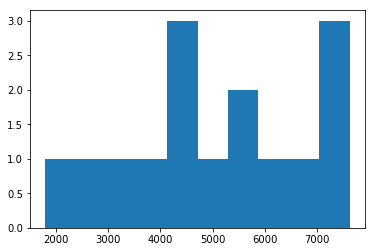

In [7]:
#plt.plot(gg)
plt.hist(gg)

In [8]:
np.mean(gg)

5122.170051430051

In [9]:
def testguess(answer,guess):
    '''returns [SumFijaPica, Fija, Pica]'''
    fijas = 0
    picas = 0
    for z in set(guess):
        fij = len(set([i for i,x in enumerate(answer) if x == z]\
                     ).intersection([i for i,x in enumerate(guess) if x == z]))
        if fij>0:
            fijas += fij
            if fijas ==4:
                print(guess,'WIN')
                break  
        else:
            if z in answer:
                picas += 1
    return [fijas+picas,fijas,picas]

In [10]:
def evaluate(current,new):
    ''' Used to evaluate change in guesses
    [SUM_fijaPica, Fija, Pica]'''
    return [b-a for a, b in zip(testguess(pl2,current), testguess(pl2,new))]

In [12]:
def fijas(answer,guess):
    """solves for 1 fija if have a pica"""
    for x in range(26):
        t =testguess(answer,guess)
        #print([x,guess,testguess(answer,guess)])
        if t[0]==0:
            print('Nothing!')
            break
        if t[1]>0:
            print('rounds ->',x+1,',fija:',\
                  testguess(answer,guess)[1],'pica:',testguess(answer,guess)[2],'sum_fp:',t[0])
            return [guess,testguess(answer,guess),'rounds->',x+1]
            break
        else:
            guess.append(guess.pop(0))

In [126]:
pl2 = [rd.randint(0,9),rd.randint(0,9),rd.randint(0,9),rd.randint(0,9)]

In [127]:
pl2 #[9, 6, 6, 6]

[7, 5, 4, 6]

In [128]:
def holdSwap(lis, hold):
    m=[y for y in range(4) if y not in hold]
    #print(m)
    x=[0,0,0,0]
    x[hold[0]]=lis[hold[0]]
    x[hold[1]]=lis[hold[1]]
    x[m[0]]=lis[m[1]]
    x[m[1]]=lis[m[0]]
    return x

In [244]:
def addnewNumber(lis,position=0):
    """Return new sequence where a Fija or pica is gained from adding new number"""
    m=sorted([y for y in range(10) if y not in lis],reverse=True)
    print(m)
    x=lis.copy()
    #print(x,m,'pos',position)
    testround=0
    #enumerate doesnt work for rounds because I wont check a number that is already in same spot.
    for l in m:
        if x[position]!=l:
            x[position]=l
        #print(evaluate(lis,x),lis,x,position)
            if evaluate(lis,x)[1]<0 and evaluate(lis,x)[0]<0: #if fija lost and fijapica lost..
                position+=1
                x=lis.copy()
                testround+=1
                #print('return','pos',position)
                print('AddnewNumber Tried {}: FAILED, rolledback, +1 position , +1 Round,-1Fija,-1SumFP'.format(l))
            elif evaluate(lis,x)[1]<0 and evaluate(lis,x)[0]>=0:#if fija lost but gain pica..that number still good...
                position+=1
                x=lis.copy()
                m.append(l)
                testround+=1
                #print('return but..','pos',position)
                print('AddnewNumber Tried {}: FAILED..sorta, rolledback,new#putback, +1 position , +1 Round,-1Fija,0+SumFP'.format(l))
            elif evaluate(lis,x)[0]>0:
                testround+=1
                #print('round :',testround)
                print('AddnewNumber Tried {}: SUCCESS!, updated, +0 position , +1 Round,+1Fija'.format(l))
                return [x,position,testround]

In [232]:
def repeats(lis,pos):
    posi=pos
    b=lis.copy()
    laps=0
    for x in pop:
        b[posi]=x
        #print(evaluate(lis,b),b,b)
        if evaluate(lis,b)[1]<0 and evaluate(lis,b)[0]<0:
            posi+=1
            b=lis.copy()
            laps+=1
            print('Repeat Tried {}: FAILED, rolledback, +1 position , +1 Round,-1Fija,-1SumFP'.format(x))
            return [b,posi,laps]
        elif evaluate(lis,b)[1]>0:
            #print(evaluate(pop,b)[1]>0)
            #lis=b cant reassign variable passed through a variable
            #print(b,posi,posi)
            laps+=1
            print('Repeat Tried {}: SUCCESS!, updated, +0 position , +1 Round,+1Fija'.format(x))
            return [b,posi,laps]
            

In [218]:
pl2

[1, 4, 7, 2]

In [215]:
pop

[3, 3, 7, 0]

In [216]:
pl2 = [rd.randint(0,9),rd.randint(0,9),rd.randint(0,9),rd.randint(0,9)]
#pl2=[7,7,7,7]
#pop = [0,1,2,3]
pop=[rd.randint(0,9),rd.randint(0,9),rd.randint(0,9),rd.randint(0,9)]
#fijas(pl2,pop)
position=0
rounds=1

In [201]:
#pl2=[9,6,6,6] 
#[0, 6, 8, 4]
#pop=[0,1,2,3]#[4,5,6,7]#[0,1,2,3]
#fijas(pl2,pop)
#pop=[92]
print(pop)

if testguess(pl2,pop)[0]==testguess(pl2,pop)[1]: 
    #if sumfijapica==fija then need new number, have repeats, or have repeats of new numbers
    if  addnewNumber(pop) is not None and addnewNumber(pop)[0] != pop:
        print('get new number')# is not None:
        print(position)
        rounds+=addnewNumber(pop,position)[2]
        pop,position = addnewNumber(pop,position)[:2]
        print('we round:',rounds)
    else:
        print('repeats??')
        print(position)
        rounds+=repeats(pop,position)[2]
        pop,position = repeats(pop,position)[:2]
        print('we round:',rounds)

else:
    print('gain another fija')
    for h in [ [int(x),int(y)] for x,y in it.combinations('0123',2)]:
        contender = holdSwap(pop,h)
        if evaluate(pop,contender)[1]>0:
            print(h,pop,holdSwap(pop,h),evaluate(pop,contender))
            pop = contender
            print(testguess(pl2,pop))
            rounds+=1
            print('we round:',rounds)
            break
print(pop,testguess(pl2,pop),'ROUNDS:',rounds)

[2, 4, 2, 9]
AddnewNumber Tried: FAILED, rolledback, +1 position , +1 Round,-1Fija,-1SumFP 
AddnewNumber Tried: FAILED, rolledback, +1 position , +1 Round,-1Fija,-1SumFP 
AddnewNumber Tried: FAILED, rolledback, +1 position , +1 Round,-1Fija,-1SumFP 
repeats??
3
[2, 4, 2, 4] WIN
[2, 4, 2, 4] WIN
Repeat Tried: SUCCESS!, updated, +0 position , +1 Round,+1Fija
[2, 4, 2, 4] WIN
[2, 4, 2, 4] WIN
Repeat Tried: SUCCESS!, updated, +0 position , +1 Round,+1Fija
we round: 7
[2, 4, 2, 4] WIN
[2, 4, 2, 4] [4, 4, 0] ROUNDS: 7


In [245]:
pl2 = [rd.randint(0,9),rd.randint(0,9),rd.randint(0,9),rd.randint(0,9)]

pop=[0,1,2,3]#[rd.randint(0,9),rd.randint(0,9),rd.randint(0,9),rd.randint(0,9)]

position=0
rounds=1
print(pop,'START!!',testguess(pl2,pop))
while testguess(pl2,pop)[1]!=4:
    print(pop,'NEXT!!')

    if testguess(pl2,pop)[0]==testguess(pl2,pop)[1]: 
        #if sumfijapica==fija then need new number, have repeats, or have repeats of new numbers
        addNEW=addnewNumber(pop)
        if  addNEW is not None and addNEW[0] != pop:
            print(testguess(pl2,pop),'..get new number')# is not None:
            #print(position)
            rounds+=addNEW[2]
            pop,position = addNEW[:2]
            #print('we round:',rounds)
        else:
            print(testguess(pl2,pop),'..repeats??')
            print(position)
            repeatf=repeats(pop,position)
            rounds+=repeatf[2]
            pop,position = repeatf[:2]
            #print('we round:',rounds)

    else:
        print(testguess(pl2,pop),'..get another fija')
        for h in [ [int(x),int(y)] for x,y in it.combinations('0123',2)]:
            contender = holdSwap(pop,h)
            if evaluate(pop,contender)[1]>0:
                #print(h,pop,holdSwap(pop,h),evaluate(pop,contender))
                pop = contender
                #print(testguess(pl2,pop))
                rounds+=1
                #print('we round:',rounds)
                break
    print(pop,testguess(pl2,pop),'ROUND:',rounds)

[0, 1, 2, 3] START!! [0, 0, 0]
[0, 1, 2, 3] NEXT!!
[9, 8, 7, 6, 5, 4]
AddnewNumber Tried 9: SUCCESS!, updated, +0 position , +1 Round,+1Fija
[0, 0, 0] ..get new number
[9, 1, 2, 3] [1, 1, 0] ROUND: 2
[9, 1, 2, 3] NEXT!!
[8, 7, 6, 5, 4, 0]
AddnewNumber Tried 8: FAILED, rolledback, +1 position , +1 Round,-1Fija,-1SumFP
AddnewNumber Tried 6: SUCCESS!, updated, +0 position , +1 Round,+1Fija
[1, 1, 0] ..get new number
[9, 6, 2, 3] [2, 2, 0] ROUND: 4
[9, 6, 2, 3] NEXT!!
[8, 7, 5, 4, 1, 0]
AddnewNumber Tried 8: FAILED, rolledback, +1 position , +1 Round,-1Fija,-1SumFP
AddnewNumber Tried 7: FAILED, rolledback, +1 position , +1 Round,-1Fija,-1SumFP
AddnewNumber Tried 4: SUCCESS!, updated, +0 position , +1 Round,+1Fija
[2, 2, 0] ..get new number
[9, 6, 4, 3] [3, 3, 0] ROUND: 7
[9, 6, 4, 3] NEXT!!
[8, 7, 5, 2, 1, 0]
AddnewNumber Tried 8: FAILED, rolledback, +1 position , +1 Round,-1Fija,-1SumFP
AddnewNumber Tried 7: FAILED, rolledback, +1 position , +1 Round,-1Fija,-1SumFP
AddnewNumber Tried 5: F

In [166]:
##fijas: 1 , picas: 1
SUM then hold that many numbers constant
REPLACE other random  New(not used yet) or existing? and same number n times or different numbers each substitute
#keep 2 replace exisiting same number
##fijas: 1 , picas: 0
sum < new sum & lose a pica/fija
IF PRIOR SUM WAS BETTER GO BACK/modify other way previous guess
remember last guess
remember what number Held constant and position
switch one number with what was held prior because
lose fija switch back
regain pica
save number for final solution, remember what is not in number
sum
guess new number keep constant except the one you already know

SyntaxError: invalid syntax (<ipython-input-166-856e0ac620e0>, line 2)

In [26]:
#COMBINATION AND MIXTURES STUDIES

# import math
# def nCr(n,r):
#     f = math.factorial
#     return f(n) / f(r) / f(n-r)

# print (nCr(4,2))

# #list(it.permutations('abcd',2))
# #combinations are unique groups (order no matter/as in order not a distinct group)
# #permutations are any groups but no replacement

# print(len(list(it.permutations('abcd',2)))
# ,len(list(it.combinations('abcd',2)))
# ,len(list(it.combinations_with_replacement('abcd',2)))
# ,len(list(it.product('abcd','abcd'))))